In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv(r"/content/drive/MyDrive/ML project/Ipl/finalipl.csv")

In [4]:
data.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
0,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
1,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
2,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
3,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
4,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


In [5]:
data.dtypes
data["date"]=pd.to_datetime(data["date"])


In [6]:
data.shape

(56707, 23)

In [7]:
X_train = data.drop(labels='total',axis=1)[data['date'].dt.year <= 2016]
X_test = data.drop(labels='total',axis=1)[data['date'].dt.year >=2017]

In [8]:
Y_train = data[data['date'].dt.year <= 2016]['total'].values
Y_test = data[data['date'].dt.year >= 2017]['total'].values

In [9]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [11]:
Y_train


array([222, 222, 222, ..., 208, 208, 208])

In [12]:
# Applying Standard Scaler
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(51366, 21) (5341, 21) (51366,) (5341,)


In [15]:
Dt=DecisionTreeRegressor(criterion="squared_error",random_state=10,splitter="best")
# fit the model 
Dt.fit(X_train,Y_train)
Y_pred=Dt.predict(X_test)
Dt


DecisionTreeRegressor(random_state=10)

In [16]:

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*((len(Y_train)+len(Y_test))-1)/((len(Y_train)+len(Y_test))-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.36573665909988573
RMSE: 23.40981172026233
Adj R-square: 0.36550168458883503


In [17]:
Dt.score(X_train,Y_train)

0.9997440688055981

In [18]:
print(list(zip(data.columns[0:-1],Dt.feature_importances_*100)))

[('date', 1.4915060590096447), ('bat_team_Chennai Super Kings', 1.0724670380568557), ('bat_team_Delhi Daredevils', 1.2173182925954213), ('bat_team_Kings XI Punjab', 1.2277802640559259), ('bat_team_Kolkata Knight Riders', 1.5880180704306825), ('bat_team_Mumbai Indians', 1.0381717441869764), ('bat_team_Rajasthan Royals', 1.8351848688251544), ('bat_team_Royal Challengers Bangalore', 0.8142116302370862), ('bat_team_Sunrisers Hyderabad', 1.1287337549993248), ('bowl_team_Chennai Super Kings', 1.3694982802801707), ('bowl_team_Delhi Daredevils', 1.4731856242848587), ('bowl_team_Kings XI Punjab', 1.1384339200310678), ('bowl_team_Kolkata Knight Riders', 1.2373040836191824), ('bowl_team_Mumbai Indians', 1.3956600261365422), ('bowl_team_Rajasthan Royals', 1.4856572255356546), ('bowl_team_Royal Challengers Bangalore', 0.9553937470301606), ('bowl_team_Sunrisers Hyderabad', 8.631135497170279), ('overs', 23.27058748150496), ('runs', 18.96059091799069), ('wickets', 26.172385401232784), ('runs_last_5', 

In [19]:
sample=pd.DataFrame()

sample["Column"]=data.columns[1:-1]
sample["Imp value"]=Dt.feature_importances_*100

sample.sort_values("Imp value",ascending=False)

,Column,Imp value
19,runs_last_5,26.172385
17,runs,23.270587
18,wickets,18.960591
16,overs,8.631135
20,wickets_last_5,2.496776
6,bat_team_Royal Challengers Bangalore,1.835185
4,bat_team_Mumbai Indians,1.588018
0,bat_team_Chennai Super Kings,1.491506
14,bowl_team_Royal Challengers Bangalore,1.485657
10,bowl_team_Kings XI Punjab,1.473186


In [20]:
# Saving a tree visualisation of the tree
from sklearn import tree
with open(r"ipl.text","w")as f:
    
    f=tree.export_graphviz(Dt,feature_names=data.columns[1:-1],out_file=f)
    

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
Dt=DecisionTreeRegressor(random_state=10)
# As we know KNN is not the best algorithm to use on larger data but I still wanted to check if it works or not
# Same  Goes for SVM but as it will take a lot of training time I am not using it here
knn=KNeighborsRegressor(n_neighbors=5,metric="euclidean")

In [22]:
models=[Dt,knn]
for model in models:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    r2=r2_score(Y_test, Y_pred)
    adjusted_r_squared = 1 - (1-r2)*((len(Y_train)+len(Y_test))-1)/((len(Y_train)+len(Y_test))-X_train.shape[1]-1)
    rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
    score=model.score(X_train,Y_train)
    print("The training of the ",type(model).__name__, " model is ",score*100 )
    print("The R squared error of the ",type(model).__name__, " model is ", r2*100 )
    print("The adjusted R squared error of the ",type(model).__name__, " model is ", adjusted_r_squared*100 )
    print("the RMSE of the ",type(model).__name__,"model is",rmse)
    print("/n")
    

The training of the  DecisionTreeRegressor  model is  99.97440688055981
The R squared error of the  DecisionTreeRegressor  model is  36.57366590998857
The adjusted R squared error of the  DecisionTreeRegressor  model is  36.550168458883505
the RMSE of the  DecisionTreeRegressor model is 23.40981172026233
/n
The training of the  KNeighborsRegressor  model is  96.66136670741051
The R squared error of the  KNeighborsRegressor  model is  9.695035432233823
The adjusted R squared error of the  KNeighborsRegressor  model is  9.661580298496087
the RMSE of the  KNeighborsRegressor model is 27.933086655219444
/n


From the above R squared value and the score value we can clearly see that the model is overfitting hence we cannot use such kind of models but still just wanted to check if Using Pruned Decision Tree removes overfitting, So I have tried to Prune Decision Tree


In [23]:
# This codes takes a considerable amount of time 
# from sklearn.model_selection import GridSearchCV
# parameter_space = {"min_samples_leaf":[1,3,5,7,9],
#                     "min_samples_split":[3,7,9,11],
#                    "max_depth":[20,30],
#                   "max_features":[0.6,0.7,0.8,0.9,1],
#                   "max_leaf_nodes":[250,300,400]}
    
    
# clf = GridSearchCV(Dt,parameter_space,n_jobs=-1, cv=5)
# clf.fit(X_train,Y_train)

In [24]:
# clf.best_params_

In [25]:
# clf.best_score_

In [26]:
Dt=DecisionTreeRegressor(criterion="squared_error",random_state=10,splitter="best",max_depth=20,
                        max_features=0.8,max_leaf_nodes=250,min_samples_leaf=9,min_samples_split=3
                        )
# fit the model 
Dt.fit(X_train,Y_train)
Y_pred=Dt.predict(X_test)

In [27]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared =1 - (1-r2)*((len(Y_train)+len(Y_test))-1)/((len(Y_train)+len(Y_test))-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.572138737567851
RMSE: 19.227136056435235
Adj R-square: 0.5719802285000011


In [28]:
Y_test.min()

67

Tried doing the same for KNN



## Tuning In KNN


In [19]:
np.sqrt(len(X_train))

226.64068478541094

In [29]:
knn=KNeighborsRegressor(n_neighbors=226,metric="euclidean")

In [30]:
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*((len(Y_train)+len(Y_test))-1)/((len(Y_train)+len(Y_test))-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.1693654832340632
RMSE: 26.78971555575152
Adj R-square: 0.16905775941202772


In [32]:
# my_dict={}
# for K in range(3,53):
#     knn=KNeighborsRegressor(n_neighbors=K,metric="euclidean")
#     knn.fit(X_train,Y_train)
#     Y_pred=knn.predict(X_test)
#     print ("Rsquared is ", r2_score(Y_test,Y_pred), "for K-Value:",K)
#     my_dict[K]=r2_score(Y_test,Y_pred)


In [33]:
# for i in my_dict:
#     if my_dict[i]==max(my_dict.values()):
#         print(i,":",my_dict[i])

## As both the models are not getting any better even after Hyperparameter tuning  I have tried using Bagging and Boosting Method

# Bagging And Boosting

In [16]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
Rf=RandomForestRegressor(n_estimators=500,random_state=10,bootstrap=True,n_jobs=-1) 
Et=ExtraTreesRegressor(random_state=10, bootstrap=True)
Adboost=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),n_estimators=100,random_state=10)
grad_boost=GradientBoostingRegressor(n_estimators=300,random_state=10)
Xg_boost=XGBRegressor(n_estimators=300,random_state=10)



In [35]:
models=[Rf,Et,Adboost,grad_boost,Xg_boost]
for model in models:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    r2=r2_score(Y_test, Y_pred)
    adjusted_r_squared = 1 - (1-r2)*((len(Y_train)+len(Y_test))-1)/((len(Y_train)+len(Y_test))-X_train.shape[1]-1)
    rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
    score=model.score(X_train,Y_train)
    print("The training of the ",type(model).__name__, " model is ",score*100 )
    print("The R squared error of the ",type(model).__name__, " model is ", r2*100 )
    print("The adjusted R squared error of the ",type(model).__name__, " model is ", adjusted_r_squared*100 )
    print("the RMSE of the ",type(model).__name__,"model is",rmse)
    print("/n")
    

The training of the  RandomForestRegressor  model is  99.1359631704923
The R squared error of the  RandomForestRegressor  model is  62.847831406361124
The adjusted R squared error of the  RandomForestRegressor  model is  62.834067702727594
the RMSE of the  RandomForestRegressor model is 17.916583577412958
/n
The training of the  ExtraTreesRegressor  model is  99.35940341197548
The R squared error of the  ExtraTreesRegressor  model is  60.43500118395908
The adjusted R squared error of the  ExtraTreesRegressor  model is  60.42034360302697
the RMSE of the  ExtraTreesRegressor model is 18.489224420575848
/n


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The training of the  AdaBoostRegressor  model is  99.31081928269623
The R squared error of the  AdaBoostRegressor  model is  61.851106164975576
The adjusted R squared error of the  AdaBoostRegressor  model is  61.83697320615869
the RMSE of the  AdaBoostRegressor model is 18.15532761499703
/n
The training of the  GradientBoostingRegressor  model is  72.08169920949837
The R squared error of the  GradientBoostingRegressor  model is  69.92714349627047
The adjusted R squared error of the  GradientBoostingRegressor  model is  69.91600245390339
the RMSE of the  GradientBoostingRegressor model is 16.119458792965727
/n
The training of the  XGBRegressor  model is  92.27479452936954
The R squared error of the  XGBRegressor  model is  62.551718545649614
The adjusted R squared error of the  XGBRegressor  model is  62.53784514156491
the RMSE of the  XGBRegressor model is 17.98784188756563
/n


###  Clearly Except Gradient Boosting is the only model that is not overfitting We can go ahead with hyper parameter tuning of Gradient Boosting

But still wanted to write the necessary code use for every tuning hyperparameters


# XGB regressor

In [36]:
from sklearn.model_selection import GridSearchCV
parameter_space = {
    
                   "n_estimators":[100,200,300]}
    
clf = GridSearchCV(Xg_boost,parameter_space,n_jobs=-1, cv=5)
clf.fit(X_train,Y_train)
clf.best_params_

{'n_estimators': 100}

In [37]:
clf.best_score_


0.5331763396123546

In [38]:
Xg_boost=XGBRegressor(n_estimators=100,random_state=10)
Xg_boost.fit(X_train,Y_train)
Y_pred=Xg_boost.predict(X_test)


In [39]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*((len(Y_train)+len(Y_test))-1)/((len(Y_train)+len(Y_test))-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6624581974507148
RMSE: 17.07760239645754
Adj R-square: 0.6623331488866584


# Random Forest

# This code takes a lot of time hence is not suggested to run 

In [40]:
# from sklearn.model_selection import GridSearchCV
# parameter_space = {"min_samples_leaf":[1,3,5,7,9],
#                     "min_samples_split":[3,7,9,11],
#                    "max_depth":[20,30],
#                   "max_features":[0.8,0.9,1],
#                   "max_leaf_nodes":[250,300]}
    
    
# clf = GridSearchCV(Rf,parameter_space,n_jobs=-1, cv=3)
# clf.fit(X_train,Y_train)  

In [41]:
clf.best_params_

{'n_estimators': 100}

In [42]:
clf.best_score_

0.5331763396123546

In [45]:
clf.best_score_

0.5331763396123546

# Adaboost Regressor


In [46]:
#   Adboost=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),n_estimators=400,random_state=10)
# Adboost.fit(X_train,Y_train)
# Y_pred=Adboost.predict(X_test)
# from sklearn.metrics import r2_score,mean_squared_error
# import numpy as np
 
# r2=r2_score(Y_test,Y_pred)
# print("R-squared:",r2)
 
# rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
# print("RMSE:",rmse)
 
# adjusted_r_squared = 1 - (1-r2)*((len(Y_train)+len(Y_test))-1)/((len(Y_train)+len(Y_test))-X_train.shape[1]-1)
# print("Adj R-square:",adjusted_r_squared)

# Gradient Boosting Regressor 

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their corresponding values to tune
param_grid = {
    'n_estimators': [100, 150,300],    # Number of boosting stages
    'learning_rate': [0.01, 0.1],   # Learning rate for each boosting stage
    'max_depth': [3, 4, 5,9],             # Maximum depth of the individual estimators
    'min_samples_split': [2, 3, 4],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]        # Minimum number of samples required to be at a leaf node
}
 
# Create a GridSearchCV object with the Gradient Boosting Classifier and the parameter grid
grid_search = GridSearchCV(estimator=grad_boost,param_grid=param_grid, cv=3) 

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_


In [48]:
best_params

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [17]:
Grad_boost = GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,
 max_depth=4,
 min_samples_leaf=3,
 min_samples_split=2,
   random_state=10)
Grad_boost.fit(X_train,Y_train)
Y_pred=Grad_boost.predict(X_test)

In [18]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2) 
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared =  1 - (1-r2)*((len(Y_train)+len(Y_test))-1)/((len(Y_train)+len(Y_test))-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7016180380099724
RMSE: 16.05644507492389
Adj R-square: 0.701507496928526


# This is the best model till now giving an R squared value of 0.70 . But we can use ensembling techniques just to be sure if those techniques work better


# Voting Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
# create the sub models
estimators = []
model1= DecisionTreeRegressor(criterion='squared_error',random_state=10)
estimators.append(('tree', model1))
model2 = XGBRegressor(n_estimators=100,random_state=10)
estimators.append(('XGB', model2))
model3=GradientBoostingRegressor(n_estimators=400,max_depth=20,max_features=0.8,min_samples_leaf=1,min_samples_split=7,random_state=10)
estimators.append(('knn', model3))
model4=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),n_estimators=1000,random_state=10)
estimators.append(("Adaboost",model4))
model5=RandomForestRegressor(n_estimators=500,random_state=10,bootstrap=True,n_jobs=-1) 
estimators.append(("Random_Forest",model4))
print(estimators)
# create the ensemble model
ensemble = VotingRegressor(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
#print(Y_pred)

[('tree', DecisionTreeRegressor(random_state=10)), ('XGB', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)), ('knn', GradientBoostingRegressor(max_depth=20, max_features=0.8, min_samples_split=7,
                          n_estimators=400, random_state=10)), ('Adaboost', AdaBoostRegressor(base_estimator=Deci

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [51]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared =  1 - (1-r2)*((len(Y_train)+len(Y_test))-1)/((len(Y_train)+len(Y_test))-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6533100733121076
RMSE: 17.30747555687795
Adj R-square: 0.653181635657341


# Stacking Regressor

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
# create the sub modelswb
level0 = []
#model1 = LinearRegression()
#level0.append(('log', model1))
model2 = DecisionTreeRegressor(criterion='squared_error',random_state=10)
level0.append(('tree', model2))
#model3 = SVR(kernel="rbf", C=90,gamma=0.1)
#level0.append(('svm', model3))
model4 = KNeighborsRegressor(n_neighbors=53, metric='euclidean')
level0.append(('knn', model4))
print(estimators)
level1=LinearRegression()
# create the ensemble model
ensemble = StackingRegressor(estimators=level0, final_estimator=level1, cv=5,passthrough=False)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
#print(Y_pred)

[('tree', DecisionTreeRegressor(random_state=10)), ('XGB', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)), ('knn', GradientBoostingRegressor(max_depth=20, max_features=0.8, min_samples_split=7,
                          n_estimators=400, random_state=10)), ('Adaboost', AdaBoostRegressor(base_estimator=Deci

In [53]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*((len(Y_train)+len(Y_test))-1)/((len(Y_train)+len(Y_test))-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.48741780912119625
RMSE: 21.04480334899184
Adj R-square: 0.48722791362841233


# Just to be sure I wanted to use Linear Regression hence trying it out here too


# Linear regression

## Assumption of outliers 

In [14]:
data=pd.read_csv(r"/content/drive/MyDrive/ML project/Ipl/finalipl.csv")
data.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
0,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
1,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
2,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
3,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
4,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


In [15]:
data.columns

Index(['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [ ]:
# Since the team columns are encoded columns we can ignore them while checking the assumptions for Linear regression

In [16]:
numerical=data[['overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5', 'total']]

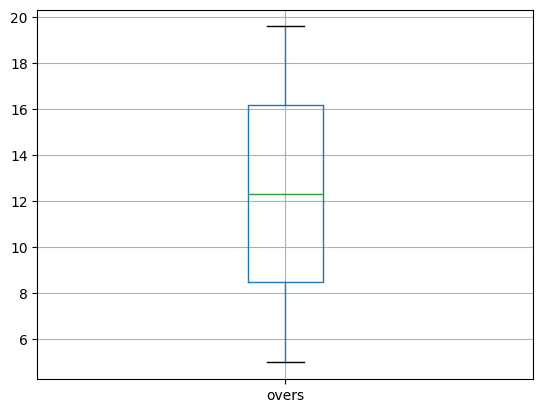

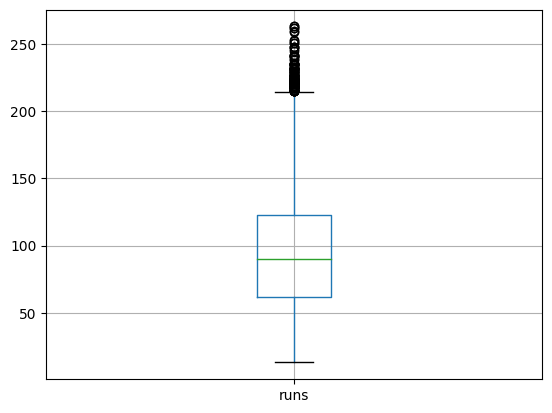

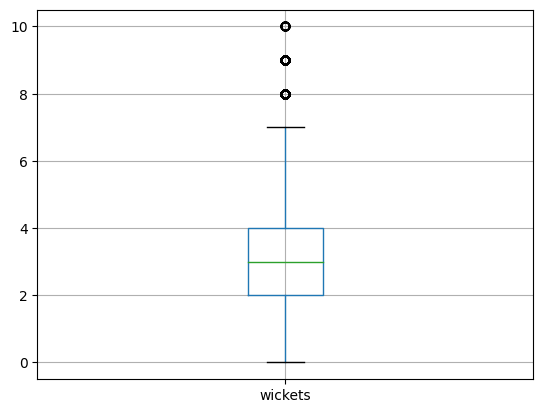

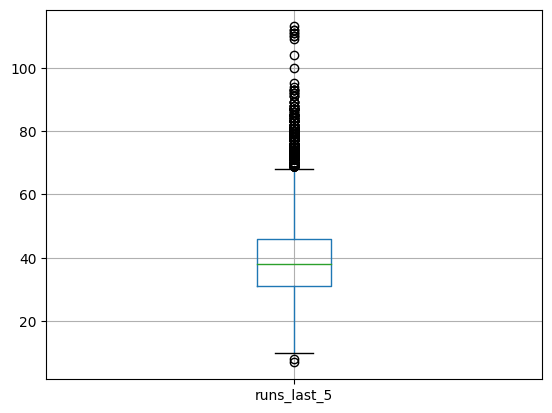

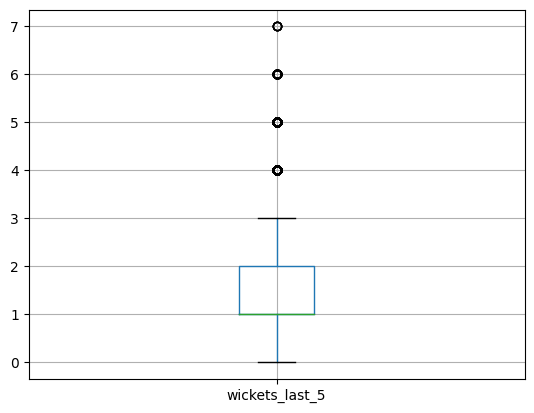

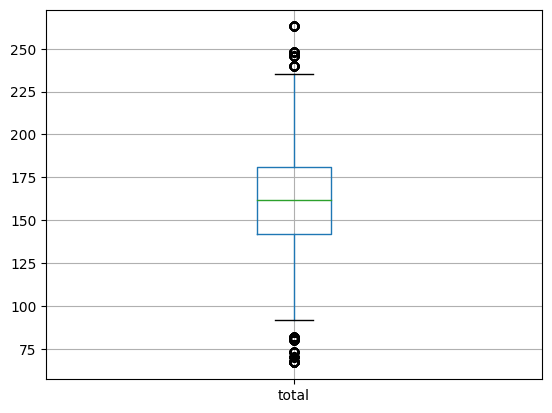

In [17]:
for i in numerical.columns:
    numerical.boxplot(column=i)
    plt.show()

### Assumption  of Linearity

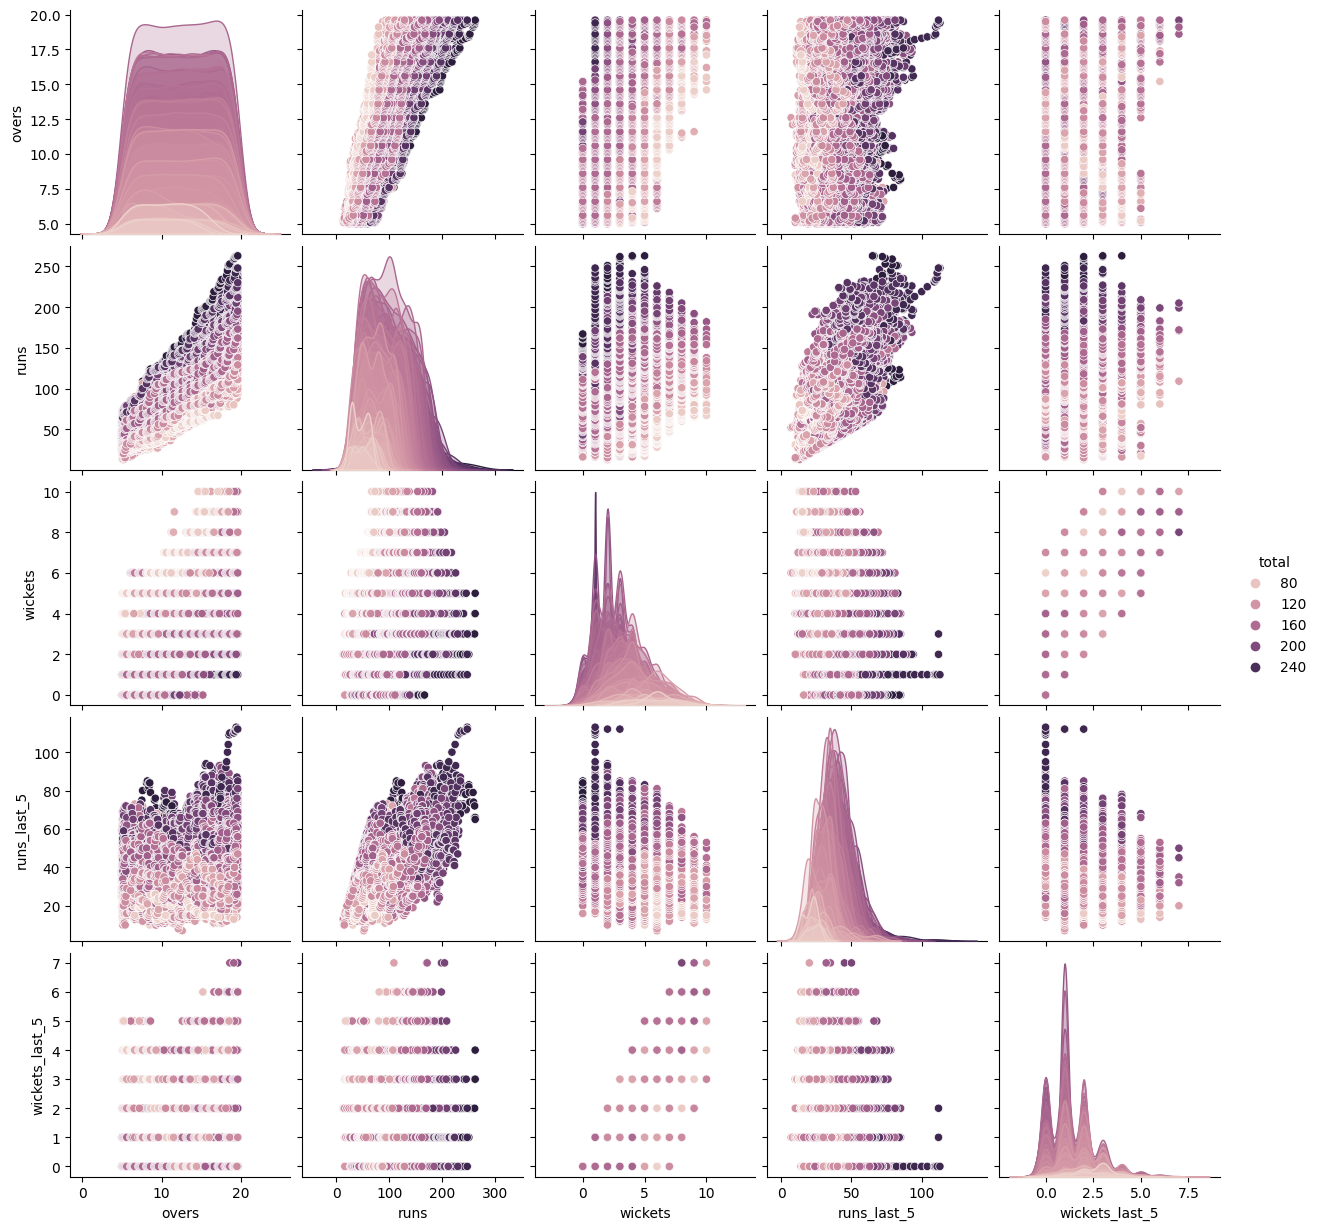

In [10]:
sns.pairplot(numerical,hue="total",kind="scatter")
plt.show()

In [18]:
data.dtypes
data["date"]=pd.to_datetime(data["date"])


In [19]:
X_train = data.drop(labels='total',axis=1)[data['date'].dt.year <= 2016]
X_test = data.drop(labels='total',axis=1)[data['date'].dt.year >=2017]

In [20]:
Y_train = data[data['date'].dt.year <= 2016]['total'].values
Y_test = data[data['date'].dt.year >= 2017]['total'].values

In [21]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

## Assumption of Normality

<ipython-input-22-3503ebf435a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train)


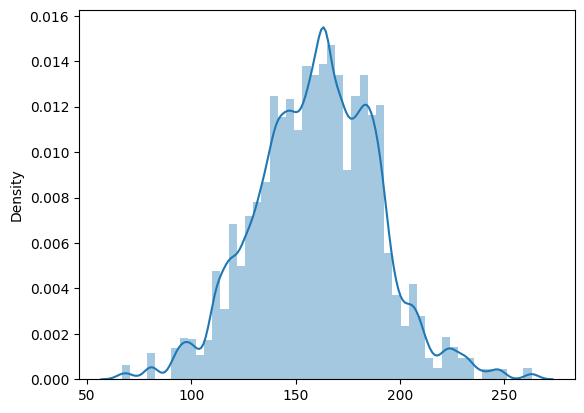

In [22]:
sns.distplot(Y_train)
plt.show()

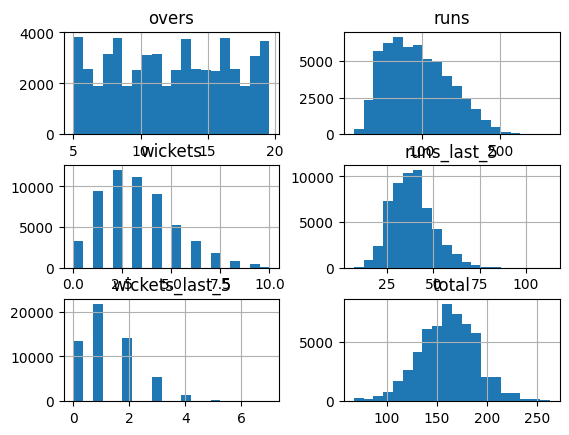

In [25]:
numerical.hist(bins=20)
plt.show()

## Skewness in data

In [28]:
from scipy.stats import skew
# This code is if there are outliers in data
#finding the skewness in each variable
# data_num_skew = X_train.apply(lambda i: skew(i.dropna())) # here i is a value in  X , and lambda gets skewed value of every column and dropping nul values if there are any
# #subsetting the variables that are highly skewed
# data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
# print(data_num_skew)
# print(data_num_skewed)

In [ ]:
# X[data_num_skewed.index] = np.sqrt(X[data_num_skewed.index])

In [29]:
skew(numerical)

array([ 0.00291802,  0.47680772,  0.66227141,  0.5721206 ,  0.77264676,
       -0.04641582])

## we can drop this Length value

##  Assumption of multicollinearity

                   overs      runs   wickets  runs_last_5  wickets_last_5  \
overs           1.000000  0.881762  0.638819     0.278524        0.220289   
runs            0.881762  1.000000  0.367882     0.571547        0.114147   
wickets         0.638819  0.367882  1.000000    -0.196927        0.630150   
runs_last_5     0.278524  0.571547 -0.196927     1.000000       -0.287617   
wickets_last_5  0.220289  0.114147  0.630150    -0.287617        1.000000   
total           0.026230  0.384214 -0.447508     0.572202       -0.297909   

                   total  
overs           0.026230  
runs            0.384214  
wickets        -0.447508  
runs_last_5     0.572202  
wickets_last_5 -0.297909  
total           1.000000  


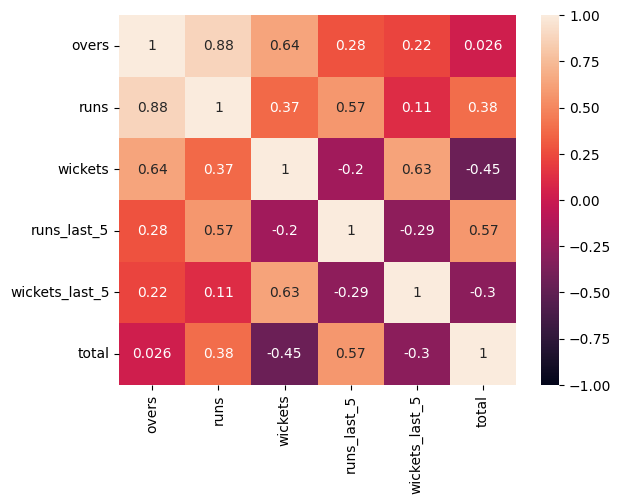

In [30]:
corr_df=numerical.corr(method="pearson")
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
print(vif_df)
vif_df["features"] = numerical.columns # first column
vif_df["VIF Factor"] = [vif(numerical.values, i) for i in range(numerical.shape[1])] #second column, X.shape[1] as shape shows ( rows,columns ) 1 indicates here is the number of columns or we can use
#vif_df["VIF Factor"] = [vif(X.values, i) for i in range(len(X.columns))] 
vif_df.round(2)
 


Empty DataFrame
Columns: []
Index: []


,features,VIF Factor
0,overs,81.24
1,runs,47.41
2,wickets,16.31
3,runs_last_5,25.91
4,wickets_last_5,5.07
5,total,24.68


In [36]:
X_train.shape # shows number of rows

(51366, 21)

In [37]:
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(5341, 21)
(51366,)
(5341,)


In [42]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train) # pass the training data and will give the best fit line equation and to get the line we use these functions
Y_pred=lm.predict(X_test)
print(lm.intercept_) # Beta 0 ,y-intercept
print(lm.coef_) #Beta 1 , beta 2, Beta 3,  slope

163.6057637134086
[ 4.51215259  2.15208564  3.56445696  1.68755547  7.00092431 -0.81763983
  9.12343728  3.59139258 -0.85221294  0.3729735   0.50366468 -4.53367964
 -2.35300703 -1.34843937 -0.87093619 -2.1256051  -6.45000432  0.97120243
 -4.48743748 -0.04664363 -1.36707451]


In [43]:
#pair the features names with coefficients
print(list(zip(data.columns[1:-1],lm.coef_)))

[('bat_team_Chennai Super Kings', 4.5121525914884995), ('bat_team_Delhi Daredevils', 2.152085644732087), ('bat_team_Kings XI Punjab', 3.564456963286574), ('bat_team_Kolkata Knight Riders', 1.68755546749796), ('bat_team_Mumbai Indians', 7.000924314168022), ('bat_team_Rajasthan Royals', -0.8176398275610155), ('bat_team_Royal Challengers Bangalore', 9.123437283657593), ('bat_team_Sunrisers Hyderabad', 3.5913925782840868), ('bowl_team_Chennai Super Kings', -0.8522129382155144), ('bowl_team_Delhi Daredevils', 0.3729735044679376), ('bowl_team_Kings XI Punjab', 0.5036646821775247), ('bowl_team_Kolkata Knight Riders', -4.533679641042508), ('bowl_team_Mumbai Indians', -2.3530070317276315), ('bowl_team_Rajasthan Royals', -1.3484393711572589), ('bowl_team_Royal Challengers Bangalore', -0.8709361911085935), ('bowl_team_Sunrisers Hyderabad', -2.1256050992480366), ('overs', -6.45000432245365), ('runs', 0.9712024273968387), ('wickets', -4.487437475348364), ('runs_last_5', -0.04664362938533195), ('wic

In [44]:
lm.score(X_train,Y_train)

0.6462698880733142

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared =1 - (1-r2)*((len(Y_train)+len(Y_test))-1)/((len(Y_train)+len(Y_test))-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6924403894426646
RMSE: 16.301507440246535
Adj R-square: 0.6923264483326408


# As our Linear Regression model is not better than Gradient Boosting Model we use the Gradient Boosting
